<a href="https://colab.research.google.com/github/Varanasi-Software-Junction/vsjcolab/blob/main/Polynomial_fit_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polyfit Demo**

[polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfit.html#numpy.polynomial.polynomial.polyfit)

[Warnings](https://docs.scipy.org/doc/numpy-1.17.0/reference/generated/numpy.polynomial.polyutils.RankWarning.html)

[polyval](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyval.html)

[pyplot](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html)

[r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [7]:
import numpy
from numpy.polynomial import polynomial as poly
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import random
import warnings
warnings.simplefilter('ignore', numpy.polynomial.polyutils.RankWarning)

In [8]:
x = [1,2,3,4,5,6,7,8,9,10]# Input X from 1 to 10
listy=[[2,2,2,2,2,2,2,2,2,2],[1,2,3,4,5,6,7,8,9,10],[1,4,9,16,25,36,49,64,81,100],[1,8,27,64,125,216,343,512,729,1000],[1,16,81,256,625,1296,2401,4096,6561,10000],[random.randint(-10, 10),random.randint(-10, 10),random.randint(-10, 10),random.randint(-10, 10),random.randint(-10, 10),random.randint(-10, 10),random.randint(-10, 10),random.randint(-10, 10),random.randint(-10, 10),random.randint(-10, 10)],[1,-1,1,-1,1,-1,1,-1,1,-1]]
titles=["Constant","Linear","Quadratic","Cubic x^3","x^4","Random","ALternate"]
colors=["blue","red","yellow","green","black","brown"]


In [9]:
def plotGraph(x,y,scattercolor,linecolor,label,title):
  plt.scatter(x,y,color=scattercolor)
  plt.plot(x,y,linecolor,label=label)
  plt.ylabel('Y')
  plt.xlabel('X')
  plt.title(title)
  plt.legend()
  plt.show()



In [10]:
def bestfitModel(x,y):
  bestcoeff=-1
  bestmodel=None
  bestpower=0
  degrees=[0,1,2,3,4,5]
  coefficients=[]
  plt.scatter(x,y,color="orange")
  plt.plot(x, y,'orange',label="Original Data")
  for r in range(0,6):
    model = poly.polyfit(x, y, deg=r)# Generate the model
    coeff=r2_score(y, poly.polyval(x,model))
    coefficients.append(coeff)


    plt.plot(x, poly.polyval(x,model),colors[r],label="Degree " + str(r))
    
    


    

    if coeff>bestcoeff:
      bestcoeff=coeff
      bestmodel=model
      bestpower=r
  plt.ylabel('Y')
  plt.xlabel('X')
  plt.legend()
  plt.title("0-5 degrees " + titles[n])
  plt.show()
  plotGraph(degrees,coefficients,"blue","-r","Coefficient","Coefficients v Degrees")
  print("The degrees \n",degrees,"\n coefficients of correlation",coefficients)
  return bestcoeff,bestmodel,bestpower


In [15]:
'''
Input Y.
0 is constant
1 is linear
2 is quadratic
3 is cubic = x^3
4 is x^4
5 is random between -10 and 10
6 is alternately +1 and -1
'''
n=int(input("Pick a number between 0 and 6\nnumber= "))
y=listy[n]# Change Here 0,1,2,3,4
plotx=[-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

Pick a number between 0 and 6
number= 5



Processed Output



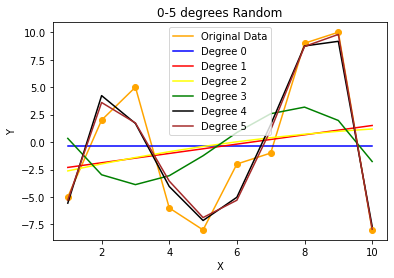

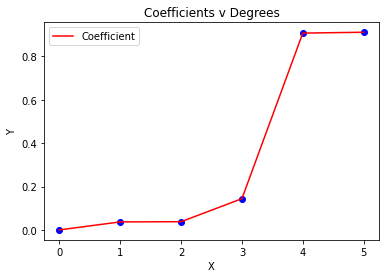

The degrees 
 [0, 1, 2, 3, 4, 5] 
 coefficients of correlation [0.0, 0.036899813241761725, 0.03782230857280566, 0.14383686227622583, 0.9067150129525885, 0.910617877814697]
Coeff of consistency  0.910617877814697 , Max Power 5 
 Calculated Model  [-3.36666667e+01  4.12588578e+01 -1.45125291e+01  1.64423077e+00
 -1.31118881e-02 -4.48717949e-03]
The equation is Y=
             5           4         3         2
-0.004487 x - 0.01311 x + 1.644 x - 14.51 x + 41.26 x - 33.67  for  Random


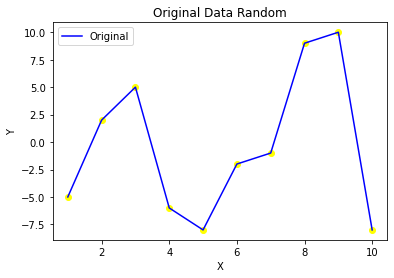

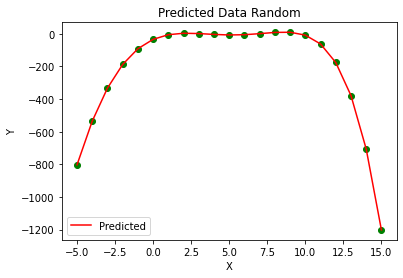

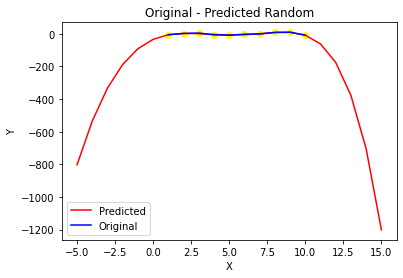


Tabular outputs


Original X [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] , Original Y [-5, 2, 5, -6, -8, -2, -1, 9, 10, -8]
Input X [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] , Output Y [-8.02475524e+02 -5.34895105e+02 -3.32421911e+02 -1.87454545e+02
 -9.10909091e+01 -3.36666667e+01 -5.29370629e+00  3.60139860e+00
  1.73892774e+00 -3.55244755e+00 -6.87412587e+00 -5.29603730e+00
  1.10489510e+00  8.70629371e+00  9.80186480e+00 -7.93706294e+00
 -6.20000000e+01 -1.75575758e+02 -3.78090909e+02 -7.05748252e+02
 -1.20206527e+03]
X for input  [-11, 7, 11] Predicted [-3.90130769e+03  1.10489510e+00 -6.20000000e+01]


In [16]:
print("\nProcessed Output\n")
coeff,model,power=bestfitModel(x,y)# Return the coefficient of correlation, model as numpy array of coefficients with the powers in increasing power order, and power = highest power.

print("Coeff of consistency ",coeff,", Max Power",power,"\n Calculated Model ",model)
equation=str(numpy.poly1d(numpy.flip(model)))# Get the model output formatted as a equation. Model is an nparray, poly1d requires the array of coefficients in reverse order. Hence th flip.
print("The equation is Y=\n ",equation," for ",titles[n])
ploty=poly.polyval(plotx,model)

plotGraph(x,y,'yellow',"b-","Original","Original Data " + titles[n])
plotGraph(plotx,ploty,'green',"r-","Predicted",'Predicted Data ' + titles[n])
plt.plot(plotx, ploty,"r-",label="Predicted")
plt.scatter(x,y,color="yellow")
plt.plot(x,y,"b-",label="Original")
plt.ylabel('Y')
plt.xlabel('X')
plt.legend()
plt.title("Original - Predicted " + titles[n])
plt.show()
print("\nTabular outputs\n\n")
print("Original X",plotx,", Original Y",y)
print("Input X",plotx,", Output Y",ploty)
xvalue=[-11,7,11]
predict=poly.polyval(xvalue,model)
print("X for input ",xvalue,"Predicted",predict)